## Telco Customer Churn : Focused customer retention program

### Analysis Approach:

## 1. Import library & Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# Load data
telco = pd.read_csv('/Users/eugicehan/Documents/Data Analytics /Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Prepocessing

In [4]:
telco.shape

(7043, 21)

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# Change the data type of TotalCharges to float
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')
telco.TotalCharges.dtypes

dtype('float64')

In [17]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
telco.describe(include = object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,4782-OSFXZ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [15]:
# Check missing value
telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
# Check duplicates
telco.duplicated().sum()

0

In [18]:
# Drop missing value
telco.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Observations:

1. The dataset consist a total of 7032 records.(total:7043)

2. There are 21 columns with 19 features, which can be distribute into 2 groups: numeric features(3 sets) & categorical features(16 sets). 

3. 'Churn' is our target variable for this project. 

3. TotalCharges data types had been changed to float.

4. There are 11 missing value in TotalCharges column, considering that the missing values are <1% of the dataset, we drop these records.

## 3. Churn

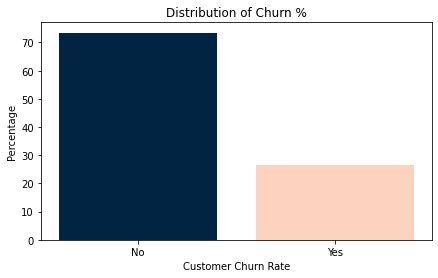

In [47]:
fig, axes = plt.subplots(figsize=(7,4))
data = telco["Churn"].value_counts(normalize=True)

axes.bar(data.index, data*100, color=['#012443', '#FDD2BF'])
axes.set_title('Distribution of Churn %')
axes.set_ylabel('Percentage')
axes.set_xlabel('Customer Churn Rate')
plt.show()

In [45]:
telco.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

#### Observations:

 - The churn rate is close to 30% based on the dataset provided.

## 4. Numerical Features Analysis

As mentioned above, there are only 3 numerical columns:tenure, monthly charges and total charges. We are going to use kdeplot function to explore the density distribution of these variables.

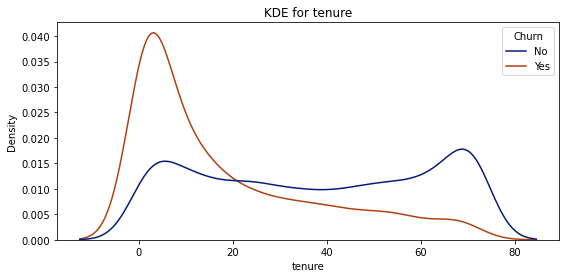

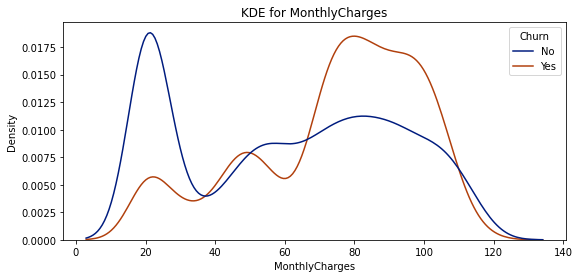

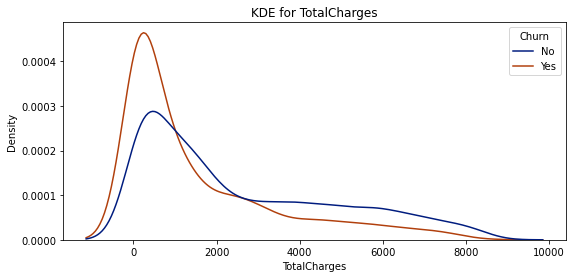

In [105]:
sns.set_palette('dark')

def kde(feature):
    plt.figure(figsize=(9,4))
    plt.title('KDE for {}'.format(feature))
    sns.kdeplot(feature, data=telco,hue='Churn',color=['navy','orange'], common_norm=False, common_grid=True)

kde('tenure')
kde('MonthlyCharges')
kde('TotalCharges')

#### Observations 
According to the figures above, we observe that:
 - New clients are more likely to churn.
 - Clients with higher Monthly Charges are more likely to churn.
 - Tenure and Monthly Charges are important variables.


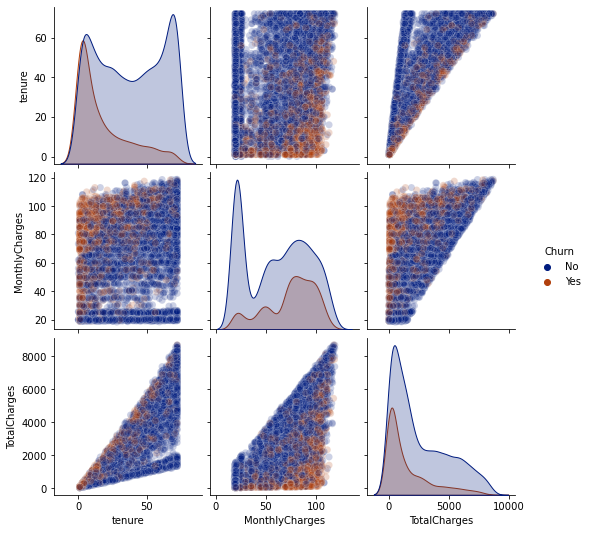

In [106]:
# Scatter plot of numerical data 
numeric_data = telco[['Churn','tenure','MonthlyCharges','TotalCharges']]
sns.pairplot(numeric_data, hue='Churn',plot_kws=dict(s=50,edgecolor="w",color="g",alpha=.2))

## 5. Categorical Data

### 5.1 Gender & SeniorCitizen

Text(0.5, 1.0, 'Among customers in each gender, what is the percentage of churn?')

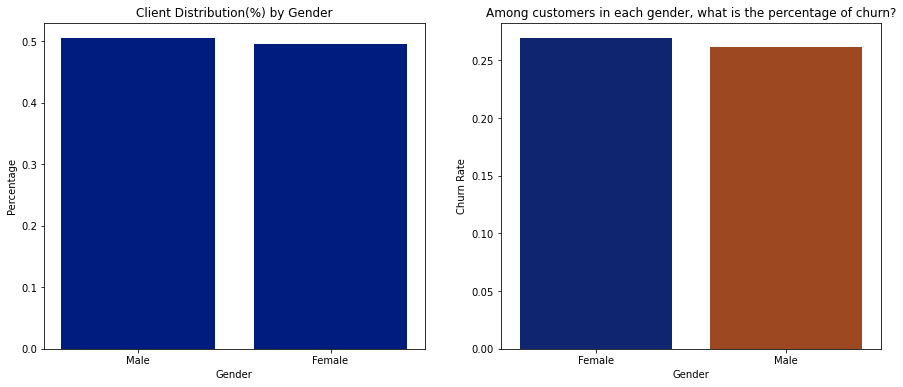

In [147]:
# Client distribution by Gender & Churn Rate by Gender
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Distribution of gender
gender = telco['gender'].value_counts(normalize=True)
axes1.bar(gender.index, gender)
axes1.set_title('Client Distribution(%) by Gender')
axes1.set_xlabel('Gender')
axes1.set_ylabel('Percentage')

telco['churn_rate'] = telco['Churn'].replace("No", 0).replace("Yes", 1)

#Churn rate by gender
sns.barplot(x="gender", y="churn_rate", data=telco, ci=None, ax=axes2)
axes2.set_xlabel('Gender')
axes2.set_ylabel('Churn Rate')
axes2.set_title('Among customers in each gender, what is the percentage of churn?')


- The gender distribution of this dataset is almost equal. 
- The churn rate between male and female clients are almost the same.


[Text(0, 0, 'Non-Senior Citizen'), Text(1, 0, 'Senior Citizen')]

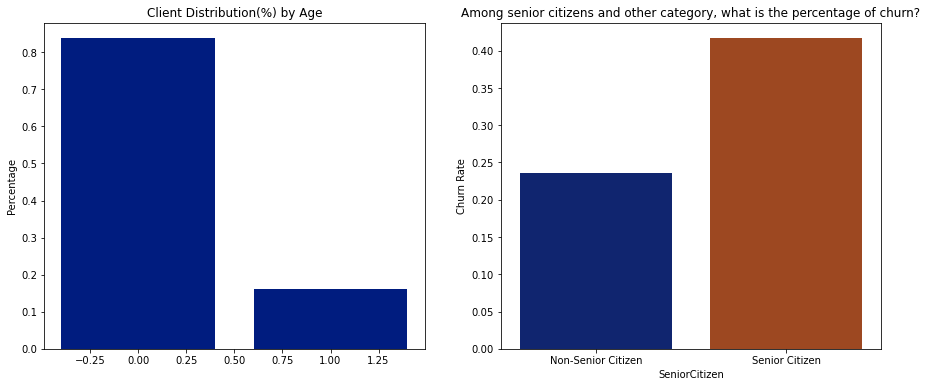

In [153]:
# Client Distribution by Age and Churn Rate by Age
fig, [axes3, axes4] = plt.subplots(1, 2, figsize=(15,6))

# Distribution of gender
gender = telco['SeniorCitizen'].value_counts(normalize=True).sort_index()
axes3.bar(gender.index, gender)
axes3.set_title('Client Distribution(%) by Age')
axes3.set_ylabel('Percentage')
axes1.set_xticks([0, 1])
axes1.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])

#Churn rate by gender
sns.barplot(x="SeniorCitizen", y="churn_rate", data=telco, ci=None, ax=axes4)
axes4.set_ylabel('Churn Rate')
axes4.set_title('Among senior citizens and other category, what is the percentage of churn?')
axes4.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])


- Only 16% of the clients are Senior Citizens
- Over 40% of the Senior Citizens clients churned, while the churn rate among Non-Senior Citizen clients is just about 25%.


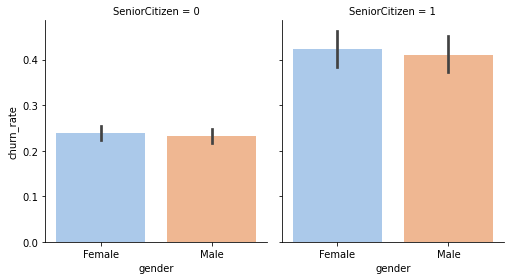

In [130]:
g = sns.FacetGrid(telco, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette='pastel',order= ['Female', 'Male'])


### Observations:

 - Gender is not a indicative of churn.
 - Senior Citizens has higher churn rate.
 

### 5.2 Partner & Dependents 

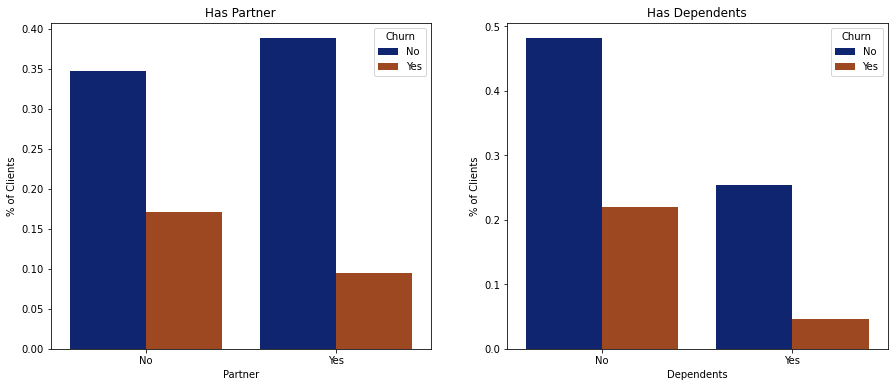

In [185]:
fig, axis = plt.subplots(1,2, figsize=(15,6))
axis[0].set_title('Has Partner')
axis[1].set_title('Has Dependents')
axis_y = '% of Clients'

# Plot Partner chart
gp_partner = telco.groupby('Partner')["Churn"].value_counts()/len(telco)
gp_partner = gp_partner.to_frame().rename({'Churn':axis_y},axis=1).reset_index()
ax1 = sns.barplot(x='Partner', y=axis_y , hue='Churn', data=gp_partner, ax=axis[0])

# Plot Dependents chart
gp_dep = telco.groupby('Dependents')["Churn"].value_counts()/len(telco)
gp_dep = gp_dep.to_frame().rename({'Churn':axis_y},axis=1).reset_index()
ax2 = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

### Observations

- Single clients are more likely to churn.
- Clients taht doest not have dependents also more likely to churn.


### 5.3 Phone & Internet Services

Telco business are made up of 2 type of services: phone & internet services. The former has serveral additional such as online backup, online backup and etc.

#### Phone Services 

There are 2 features related to phone services: if a client subscribe to phone service and if he/she has multiple line.

<ipython-input-191-6e8a58fe37d9>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


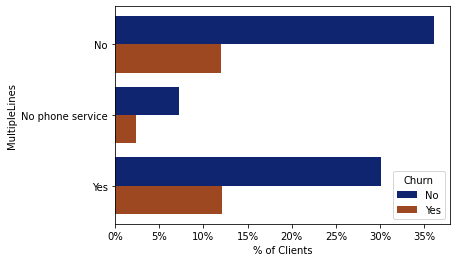

In [191]:
def barplot_pct(feature, orient='v', axis_name="% of Clients"):
    ratios = pd.DataFrame()
    df = telco.groupby(feature)["Churn"].value_counts().to_frame()
    df = df.rename({"Churn": axis_name}, axis=1).reset_index()
    df[axis_name] = df[axis_name]/len(telco)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=df, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=df, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
    
    
barplot_pct("MultipleLines", orient='h')



- Most Clients subscribe to phone services
- The churn rate of clients who subscribe to multiple lines is higher than clients with single line. 

#### Internet Services

<ipython-input-191-6e8a58fe37d9>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


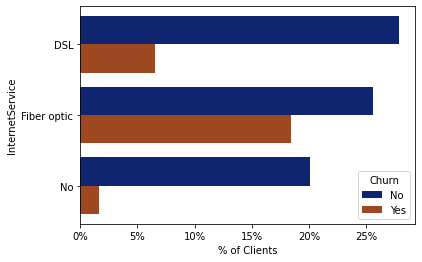

In [193]:
barplot_pct('InternetService', orient='h')

- The probability of churn for clients does not subscribe to internet service is low.

- Churn rate among Fiber Optic users is pretty high (> 40%), while it is 20% among DSL users. Hence, CSP needs to look into the quality of its internet service.

#### Additional Services 

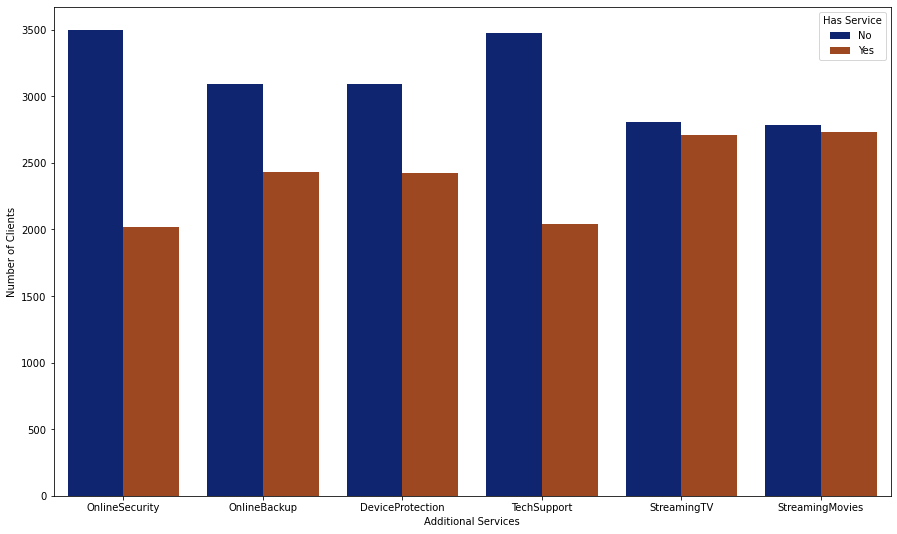

In [194]:
add_services = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df1 = pd.melt(telco[telco['InternetService']!= 'No'][add_services]).rename({'value':'Has Service'}, axis=1)

plt.figure(figsize=(15,9))

ax = sns.countplot(data=df1, x='variable', hue='Has Service')
ax.set_xlabel('Additional Services')
ax.set_ylabel('Number of Clients')

plt.show()

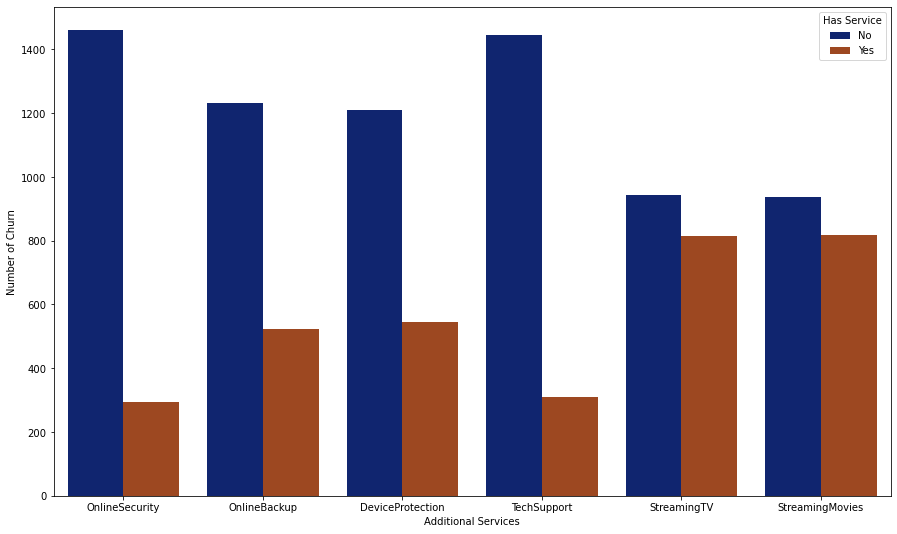

In [209]:

df2 = pd.melt(telco[(telco.InternetService != 'No') & (telco.Churn == 'Yes')][add_services]).rename({'value':'Has Service'}, axis=1)

plt.figure(figsize=(15,9))

ax = sns.countplot(data=df2, x='variable', hue='Has Service', hue_order=['No','Yes'])
ax.set_xlabel('Additional Services')
ax.set_ylabel('Number of Churn')

plt.show()

The first plot shows the total number of customers for each additional service.The second shows the number of clients that churn.

- Clients who subscribe to the first 4 types of additional services are less likely to churn.

- StreamingTV and Streaming Movies services are not predictive.

### Observations
 - Phone Service - Almost all (90%) customers have Phone Service. However, the churn rate is very low compared to the volume (~25%). On the other hand, churn rate is almost same (~25%) among non-phone service customers as well (though they form only 10% of the population). Thus, selling Phone Service is more beneficial for the CSP.
 
 - Internet Service - Approx 20% customers do not use internet. Among customers using internet, approx 45% use Fiber Optic and 35% use DSL. However, churn among Fiber Optic users is pretty high as well (> 40%), while it is 20% among DSL users. Hence, CSP needs to look into the quality of its internet service.
 
 - Online Security and Tech Support are the most popular additional services, with least number of churn as well.
 
 - Streaming services is not a predictive indicator.
 

### 5.4 Contract 

<ipython-input-191-6e8a58fe37d9>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


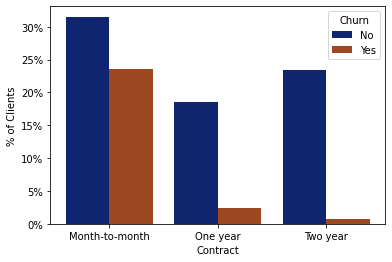

In [207]:
barplot_pct('Contract')

### Observations

 - Most clients choose month-to-month contract
 - The churn rate is high among monthly customers and least among 2-year contracted customers. While this is expected because of the contract duration, this is an alarming signal for CSP since should try to retain contracted customers and bring the churn rate to near zero, in addition to spending effort on month-to-month customers.

### 5.5 Payment Method & Billing Method 

<ipython-input-191-6e8a58fe37d9>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


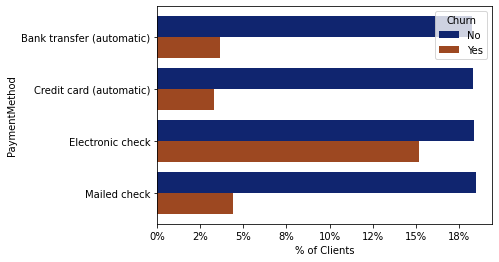

In [216]:
barplot_pct('PaymentMethod', orient= 'h')

<ipython-input-191-6e8a58fe37d9>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


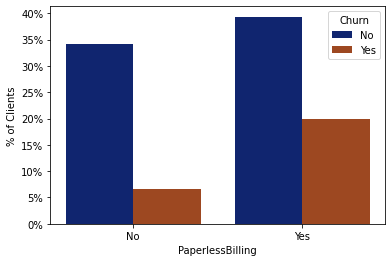

In [212]:
barplot_pct('PaperlessBilling')

### Observations
 
 - Electronic check is the most popular payment method while the churn rate of this payment method is the highest among all approach.
 
 - More clients prefer paperless billing but they are more probable to churn.
 

## 6. Correlation 

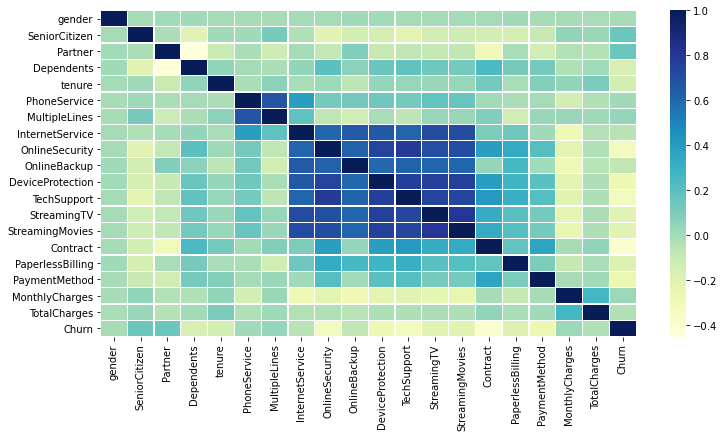

In [220]:
plt.figure(figsize=(12, 6))
telco_corr = telco.drop(['customerID','churn_rate'], axis=1)
corr = telco_corr.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

### Key Highlights:

Based on the observations made so far, the key takeaways or highlights are:

 - Tenure and Contract duration seems to be strong factors in determining churn.

 - Among service types, phone service seems to be most popular.

 - CSP should investigate if customers receiving digital invoice have any concern with understanding the bill details.

 - Also, they should encourage customers to move to automated payment modes to improve customer experience.

 - Gender does not play an important role. However, CSPs should take care of the experience of senior citizens.